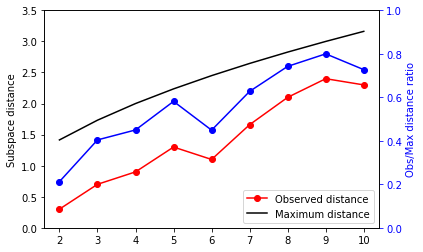

In [81]:
import numpy as np
import matplotlib.pyplot as plt
dist = []
for k in range(2,11):
    obs_pc = np.loadtxt(f'sciamachy/scia_pcs_{k}.txt')
    sim_pc = np.loadtxt(f'cmip5/ccsm3_pcs_{k}.txt')
    I = obs_pc.T @ sim_pc @ sim_pc.T @ obs_pc
    dist.append(np.sqrt(11 - np.sum(np.linalg.eig(I)[0])))

fig, ax = plt.subplots()
ax.plot(np.arange(2,11), dist, marker='o', color='r', label='Observed distance')
ax.plot(np.arange(2,11), np.sqrt(np.arange(2,11)), color='k', label='Maximum distance')
ax.legend(loc='lower right')
ax.set_ylim(0., 3.5)
ax.set_ylabel('Subspace distance')
ax2 = ax.twinx()
ax2.set_ylim(0., 1.)
ax2.yaxis.label.set_color('b')
ax2.tick_params(axis='y', colors='b')
ax2.set_ylabel('Obs/Max distance ratio')
ax2.plot(np.arange(2,11), np.array(dist)/np.sqrt(np.arange(2,11)), marker='o', color='b')
plt.savefig('tmp.png')